In [1]:
from fastai.vision.all import *
from fastai.basics import *
from fastai.callback.all import *
import os


In [2]:
help(untar_data)

Help on function untar_data in module fastai.data.external:

untar_data(url, fname=None, dest=None, c_key='data', force_download=False, extract_func=<function file_extract at 0x00000155B2FADCA8>)
    Download `url` to `fname` if `dest` doesn't exist, and un-tgz or unzip to folder `dest`.



In [3]:
path=untar_data(URLs.PETS)

In [4]:
np.random.seed(2)

In [5]:
#a=path/'images'

In [6]:
fnames=get_image_files(path/'images')

In [7]:
#path.ls()[:3]

In [8]:
#doc(cnn_learner)

In [9]:
pat=r'(.+)_\d+.jpg$'


In [10]:
batch_tfms=[*aug_transforms(size=224,max_warp=0),Normalize.from_stats(*imagenet_stats)]
item_tfms=RandomResizedCrop(460,min_scale=0.75,ratio=(1.,1.))
bs=64

In [11]:
#dls=ImageDataLoaders.from_name_re(path,fnames,pat,batch_tfms=batch_tfms,item_tfms=item_tfms)
#databunch=dataloader

In [12]:
pets = DataBlock(blocks=(ImageBlock, CategoryBlock), #blocks-> ip-img,op-category
                 get_items=get_image_files,
                 splitter=RandomSplitter(),
                 get_y=RegexLabeller(pat = r'\\([^\\]+)_\d+.'),
                 item_tfms=item_tfms,
                 batch_tfms=batch_tfms)

In [13]:
path_im=path/'images'

In [14]:
dls=pets.dataloaders(path_im,bs=bs,num_workers = 0)

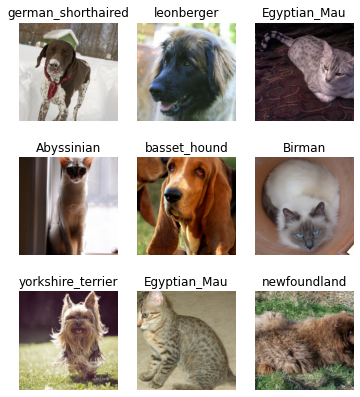

In [15]:
dls.show_batch(max_n=9, figsize=(6,7))

In [16]:
dls.vocab

(#37) ['Abyssinian','Bengal','Birman','Bombay','British_Shorthair','Egyptian_Mau','Maine_Coon','Persian','Ragdoll','Russian_Blue'...]

In [17]:
dls.vocab.o2i

{'Abyssinian': 0,
 'Bengal': 1,
 'Birman': 2,
 'Bombay': 3,
 'British_Shorthair': 4,
 'Egyptian_Mau': 5,
 'Maine_Coon': 6,
 'Persian': 7,
 'Ragdoll': 8,
 'Russian_Blue': 9,
 'Siamese': 10,
 'Sphynx': 11,
 'american_bulldog': 12,
 'american_pit_bull_terrier': 13,
 'basset_hound': 14,
 'beagle': 15,
 'boxer': 16,
 'chihuahua': 17,
 'english_cocker_spaniel': 18,
 'english_setter': 19,
 'german_shorthaired': 20,
 'great_pyrenees': 21,
 'havanese': 22,
 'japanese_chin': 23,
 'keeshond': 24,
 'leonberger': 25,
 'miniature_pinscher': 26,
 'newfoundland': 27,
 'pomeranian': 28,
 'pug': 29,
 'saint_bernard': 30,
 'samoyed': 31,
 'scottish_terrier': 32,
 'shiba_inu': 33,
 'staffordshire_bull_terrier': 34,
 'wheaten_terrier': 35,
 'yorkshire_terrier': 36}

In [18]:
learn=cnn_learner(dls,resnet34,pretrained=True,metrics=error_rate).to_fp16()

In [19]:
learn.model.cuda()


Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [20]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.910690,0.354011,0.115020,03:29
1,0.651211,0.260692,0.088633,02:03
2,0.371866,0.225685,0.075778,01:42
3,0.270001,0.226752,0.080514,01:42


In [21]:
learn.save('stage_1')

Path('models/stage_1.pth')